In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
train_df = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")

In [6]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [7]:
print("Unique labels:", train_df['label'].nunique())
print("Labels:", sorted(train_df['label'].unique()))

Unique labels: 24
Labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


### Implementing PCA

In [8]:
# filter out only the first 10 labels
train_df = train_df[train_df['label'] < 10]

# extract labels (y) and pixel values (x)
y = train_df['label'].values
x = train_df.drop('label', axis=1).values  # remove label column


In [9]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [10]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(x_scaled)

# convert into a dataframe for easy handling
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['label'] = y  # add labels back for visualization


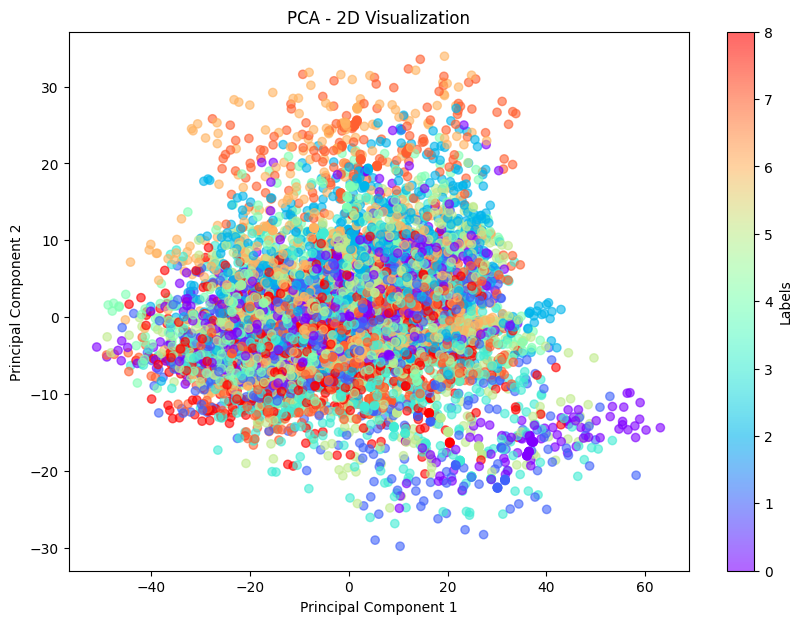

In [11]:
def plot_2d(pc1, pc2, labels):
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(pc1, pc2, c=labels, cmap='rainbow', alpha=0.6)
    plt.colorbar(scatter, label="Labels")
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA - 2D Visualization')
    plt.show()

plot_2d(pca_df['PC1'], pca_df['PC2'], pca_df['label'])


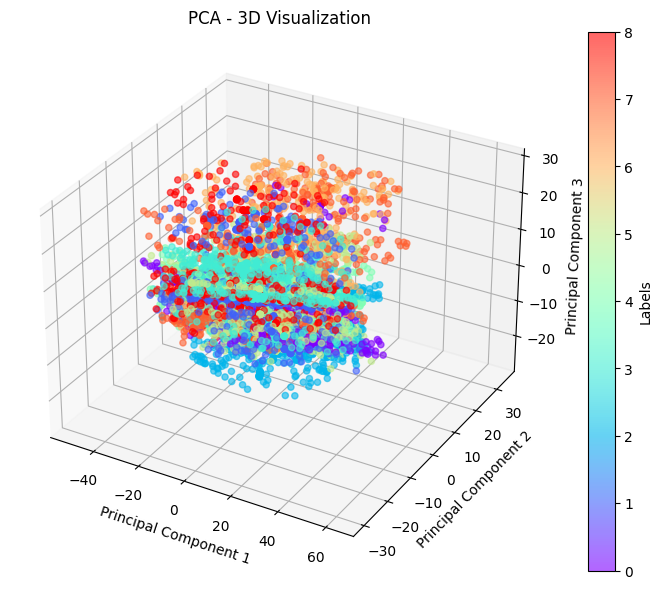

In [12]:
def plot_3d(pc1, pc2, pc3, labels):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(pc1, pc2, pc3, c=labels, cmap='rainbow', alpha=0.6)
    plt.colorbar(scatter, label="Labels")
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.title('PCA - 3D Visualization')
    plt.show()

plot_3d(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], pca_df['label'])


In [13]:
import plotly.express as px

In [14]:
fig_2d = px.scatter(
    pca_df, x='PC1', y='PC2', color=pca_df['label'].astype(str),
    title="PCA - 2D Visualization of Sign MNIST",
    labels={'color': 'Label'}
)
fig_2d.show()


In [15]:
fig_3d = px.scatter_3d(
    pca_df, x='PC1', y='PC2', z='PC3', color=pca_df['label'].astype(str),
    title="PCA - 3D Visualization of Sign MNIST",
    labels={'color': 'Label'},
    opacity=0.7
)
fig_3d.show()


In [16]:
print("Variance explained by each component:", pca.explained_variance_ratio_)
print("Total variance retained:", sum(pca.explained_variance_ratio_))


Variance explained by each component: [0.33857595 0.09332251 0.07775221]
Total variance retained: 0.509650676816734


### Implementing TSNE

In [26]:
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [27]:
import umap

ModuleNotFoundError: No module named 'umap'

In [28]:
# load the dataset
train_df = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')

# keep only the first 10 labels
train_df = train_df[train_df['label'] < 10]

# extract labels and pixel values
y = train_df['label'].values
x = train_df.drop('label', axis=1).values  # remove label column

# standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [29]:
# apply pca first to reduce to 50 dimensions for faster t-SNE
from sklearn.decomposition import PCA

pca_50 = PCA(n_components=50)
x_pca_50 = pca_50.fit_transform(x_scaled)

# apply t-SNE to reduce to 3D
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
x_tsne = tsne.fit_transform(x_pca_50)

# convert to dataframe
tsne_df = pd.DataFrame(x_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])
tsne_df['label'] = y


In [30]:
fig_tsne = px.scatter_3d(
    tsne_df, x='TSNE1', y='TSNE2', z='TSNE3', color=tsne_df['label'].astype(str),
    title="t-SNE - 3D Visualization of Sign MNIST",
    labels={'color': 'Label'},
    opacity=0.7
)
fig_tsne.show()


In [31]:
!pip install umap-learn

ERROR: Could not find a version that satisfies the requirement umap-learn (from versions: none)
ERROR: No matching distribution found for umap-learn


In [33]:
# apply lda to reduce to 3D
lda = LDA(n_components=3)
x_lda = lda.fit_transform(x_scaled, y)  # LDA needs both x and y

# convert to dataframe
lda_df = pd.DataFrame(x_lda, columns=['LDA1', 'LDA2', 'LDA3'])
lda_df['label'] = y


In [34]:
fig_lda = px.scatter_3d(
    lda_df, x='LDA1', y='LDA2', z='LDA3', color=lda_df['label'].astype(str),
    title="LDA - 3D Visualization of Sign MNIST",
    labels={'color': 'Label'},
    opacity=0.7
)
fig_lda.show()
